# Finite Difference with applications to heat transfer problems

## finite difference formula to approximate derivatives

1. Taylor expansion for a continous function $f(x)$
   \begin{align}
   f(x+h)&=\sum_{n=0}^{\infty}\dfrac{1}{n!}f^{(n)}(x)h^n\\
   &=\dfrac{1}{0!}f^{(0)}(x)h^0+\dfrac{1}{1!}f^{(1)}(x)h^1+\dfrac{1}{2!}f^{(2)}(x)h^2+\dfrac{1}{3!}f^{(3)}(x)h^3+...\\
   &=f(x)+f^{(1)}(x)h+\dfrac{1}{2!}f^{(2)}(x)h^2+\dfrac{1}{3!}f^{(3)}(x)h^3+...
   \end{align}

   \begin{align}
   f(x-h)&=\sum_{n=0}^{\infty}\dfrac{1}{n!}f^{(n)}(x)(-h)^n\\
   &=\dfrac{1}{0!}f^{(0)}(x)(-h)^0+\dfrac{1}{1!}f^{(1)}(x)(-h)^1+\dfrac{1}{2!}f^{(2)}(x)(-h)^2+\dfrac{1}{3!}f^{(3)}(x)(-h)^3+...\\
   &=f(x)-f^{(1)}(x)h+\dfrac{1}{2!}f^{(2)}(x)h^2-\dfrac{1}{3!}f^{(3)}(x)h^3+...
   \end{align}

2. Adding and subtractiong above two equations we can find the central differnce for 
       $$f^{(2)}(x)=\dfrac{d^2f(x)}{dx^2}=\dfrac{f(x-h)-2f(x)+f(x+h)}{h^2}+O(h^2)$$
   $$f^{(1)}(x)=\dfrac{df(x)}{dx}=\dfrac{f(x+h)-f(x-h)}{2h}+O(h^2)$$

4. To help you memorize the formula, I would remeber it as: 2nd order central differene for derivative $f''(x)$ is equal to sum of the previous data  point $f(x-h)$ and the next data point $f(x+h)$ and subtract two times the current data point $f(x)$, and then divide it by $h^2$.  You can do the similar for the other one.
   


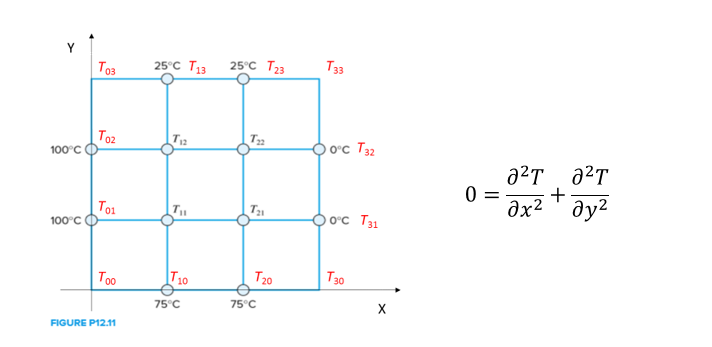

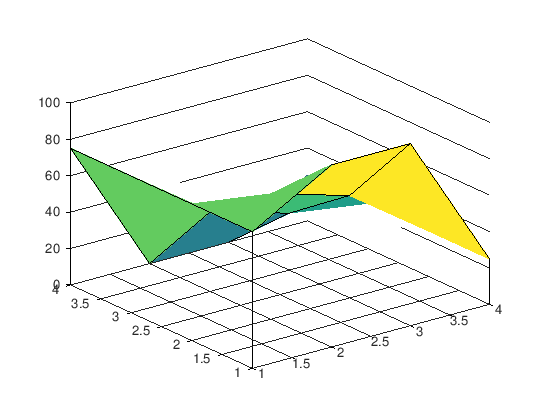

In [2]:
% use double index to solve temperature
clear;clc;
n = 4; % number of points in x and y direction
T=zeros(n,n); % 
T(1,:)=100; % left edge
T(n,:)=0; % right edge
T(:,1)=75; % bottom edge
T(:,n) = 25; % top edge

it = 10; % number of iterations
for k = 1:it
    for i = 2:n-1 % x dir exclude boundary nodes, as we know the temperature already.
        for j=2:n-1 % y direction except boundary nodes
            T(i,j)=1/4*(T(i-1,j)+T(i+1,j)+T(i,j-1)+T(i,j+1)); % formula for difference
        end
    end
end
surf(T) % plot the temperature

# A complete code with gauss iterative solver

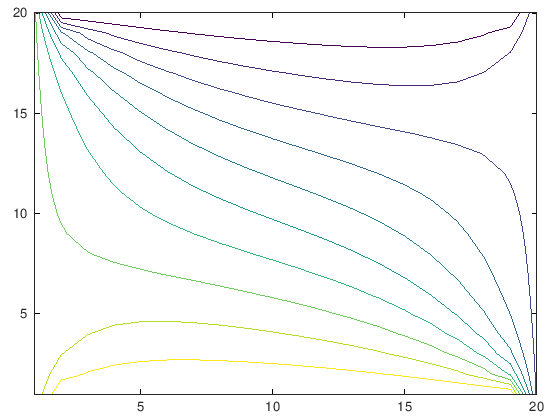

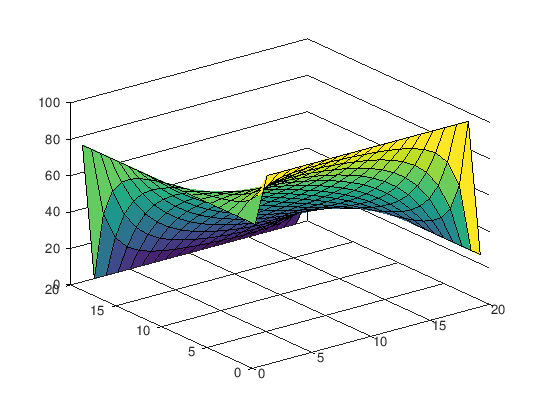

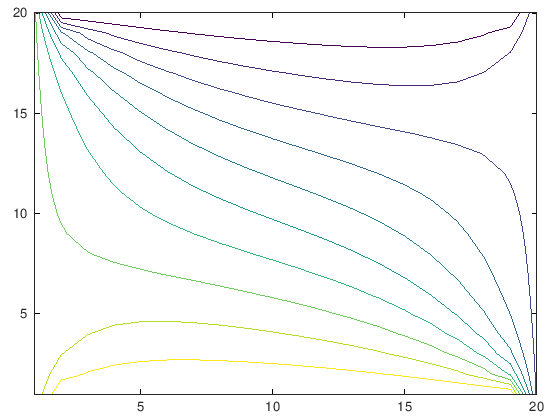

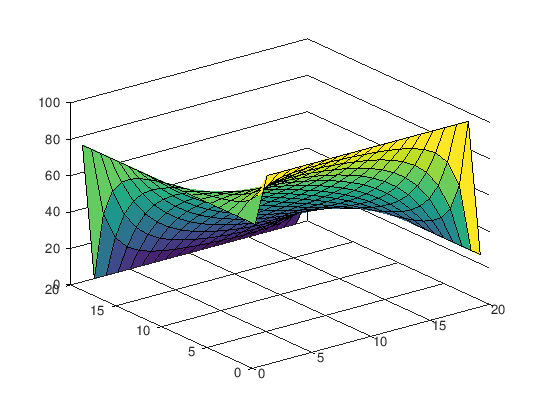

In [8]:
% use double index to solve temperature
clear;clc;
n = 20; % number of points in x and y direction
T=zeros(n,n); % 
T(1,:)=100; % left edge
T(n,:)=0; % right edge
T(:,1)=75; % bottom edge
T(:,n) = 25; % top edge

it = 100; % number of iterations
%for k = 1:it
tol = 1e-6;
Told= T;
myerr = tol + 1;
it = 0; 
while (myerr > tol)
    Told = T;
    for i = 2:n-1 % x dir
        for j=2:n-1 % y
            T(i,j)=1/4*(T(i-1,j)+T(i+1,j)+T(i,j-1)+T(i,j+1));
        end
    end
    myerr=max(max(abs(T-Told))); % take the maximum difference as error
    it = it+1;
%     surf(T) % plot the temperature
%     pause
end
figure;
surf(T) % plot the temperature
figure;
contour(T)